<h1 style="text-align: center;"><a title="Data Science-AIMS-Cmr-2021-22">Chapter 2: Basic Data Manipulation  on Time Series </h1>

**Instructor:** 

* Rockefeller

Working with time series data can be intimidating at first. The time series values are not the only information you have to consider. The `timestamps` also contain information, especially about the relationship between the values. In contrast to common data types, timestamps have a few unique characteristics. While they look like a string at first glance, they also have numerical aspects. This section will present essential techniques for effectively managing time series data.

#  How to Deal with Datetime Format


The essential part of time series data is the time component. The interval at which the variable or the phenomenon is observed or recorded. In Pandas, they take the form of **timestamps**. If these timestamps are in
Datetime format, you can apply various manipulations, which we will discuss in this
section. If not, you will have to convert it into the convenient format to unlock its various functionalities. 

## Reading Datetime Format


By default, when reading from a CSV file that contains time series, unless carefully coded before hand, `Pandas` reads timestamp columns as `strings` into a DataFrame, instead of `datetime64[ns]` data type. 
Let's practice the example below.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

># <font color=#800080>Example:</font> <a class="anchor" id="Task-1"></a>


Good air quality can make property more valuable. For real estate agencies, it is important to study the air quality in an area before building new homes. This is because:

* Areas with better air quality have higher property values.


* Areas with better air quality have lower risks of respiratory illnesses, allergies, and other health problems. Home buyers and renters often prioritize their health and the health of their families.


* Areas with better air quality tend to have lower maintenance costs. Polluted air can cause building materials to wear out faster, increase the need for cleaning, and even damage property.


Alain-realty, a real estate agency in Kinshasa, Democratic Republic of Congo, plans to build luxury apartments in response to the improved lifestyle of the Congolese people. This came as a result of the financial resources gained from exploiting coltan mines and selling its raw materials as they are used in electric cars. They have hired a team of engineers from P.L. Global Consulting to assess the air quality in Bagata, an outskirt in Kinshasa.


The engineers installed sensors to measure the **ambient temperature**, **relative humidity**, and **absolute humidity** from `October 3rd, 2004`, to `April 4th, 2005`, at **30-minutes** intervals. The resulting data is stored in a CSV file  called `Air_Quality_bagata.csv`.

In [2]:
airqual_data =  pd.read_csv('data/Air_Quality_bagata.csv')
airqual_data

,Date,Temp,Rel_Hum,Abs_Hum
0,2004-10-03 18:00:00,13.6,48.9,0.7578
1,2004-10-03 18:30:00,13.3,47.7,0.7255
2,2004-10-03 19:00:00,11.9,54.0,0.7502
3,2004-10-03 19:30:00,11.0,60.0,0.7867
4,2004-10-03 20:00:00,11.2,59.6,0.7888
...,...,...,...,...
8772,2005-04-04 12:00:00,4.5,56.3,0.4800
8773,2005-04-04 12:30:00,3.8,59.7,0.4839
8774,2005-04-04 13:00:00,4.3,58.6,0.4915
8775,2005-04-04 13:30:00,7.1,50.0,0.5067


In [3]:
airqual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8777 entries, 0 to 8776
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     8777 non-null   object 
 1   Temp     8777 non-null   float64
 2   Rel_Hum  8777 non-null   float64
 3   Abs_Hum  8777 non-null   float64
dtypes: float64(3), object(1)
memory usage: 274.4+ KB


Though the date column contains date instances, its data type is still regarded as an `object`. Hence , we need to convert into `datetime` object to use all the date related functionalities. This is done by using the `pd.to_datetime()` method.

In [4]:
airqual_data['Date'] = pd.to_datetime(airqual_data['Date'])


In [5]:
airqual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8777 entries, 0 to 8776
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     8777 non-null   datetime64[ns]
 1   Temp     8777 non-null   float64       
 2   Rel_Hum  8777 non-null   float64       
 3   Abs_Hum  8777 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 274.4 KB


In [7]:

airqual_data['day'] = airqual_data['Date'].dt.day
airqual_data

,Date,Temp,Rel_Hum,Abs_Hum,day
0,2004-10-03 18:00:00,13.6,48.9,0.7578,3
1,2004-10-03 18:30:00,13.3,47.7,0.7255,3
2,2004-10-03 19:00:00,11.9,54.0,0.7502,3
3,2004-10-03 19:30:00,11.0,60.0,0.7867,3
4,2004-10-03 20:00:00,11.2,59.6,0.7888,3
...,...,...,...,...,...
8772,2005-04-04 12:00:00,4.5,56.3,0.4800,4
8773,2005-04-04 12:30:00,3.8,59.7,0.4839,4
8774,2005-04-04 13:00:00,4.3,58.6,0.4915,4
8775,2005-04-04 13:30:00,7.1,50.0,0.5067,4


In [21]:
airqual_data.head(50)[::2] #jump every 2 rows

,Date,Temp,Rel_Hum,Abs_Hum,day
0,2004-10-03 18:00:00,13.6,48.9,0.7578,3
2,2004-10-03 19:00:00,11.9,54.0,0.7502,3
4,2004-10-03 20:00:00,11.2,59.6,0.7888,3
6,2004-10-03 21:00:00,11.3,56.8,0.7603,3
8,2004-10-03 22:00:00,10.7,59.7,0.7648,3
10,2004-10-03 23:00:00,10.1,60.5,0.7465,3
12,2004-10-04 00:00:00,10.5,58.1,0.7353,4
14,2004-10-04 01:00:00,10.8,57.4,0.7408,4
16,2004-10-04 02:00:00,10.8,58.4,0.7552,4
18,2004-10-04 03:00:00,9.5,66.8,0.7951,4


In [22]:
airqual_data.head(50)[::48] # Chaque 24 heures

,Date,Temp,Rel_Hum,Abs_Hum,day
0,2004-10-03 18:00:00,13.6,48.9,0.7578,3
48,2004-10-04 18:00:00,15.1,39.6,0.6766,4


# Daily data

In [23]:
airqual_data[::48]

,Date,Temp,Rel_Hum,Abs_Hum,day
0,2004-10-03 18:00:00,13.6,48.9,0.7578,3
48,2004-10-04 18:00:00,15.1,39.6,0.6766,4
96,2004-10-05 18:00:00,19.7,36.7,0.8307,5
144,2004-10-06 18:00:00,23.9,25.7,0.7519,6
192,2004-10-07 18:00:00,23.0,26.8,0.7446,7
...,...,...,...,...,...
8544,2005-03-30 18:00:00,1.9,35.0,0.2494,30
8592,2005-03-31 18:00:00,5.6,80.4,0.7382,31
8640,2005-04-01 18:00:00,8.6,56.3,0.6312,1
8688,2005-04-02 18:00:00,7.9,28.0,0.2999,2


Text(0.5, 0, 'time slots')

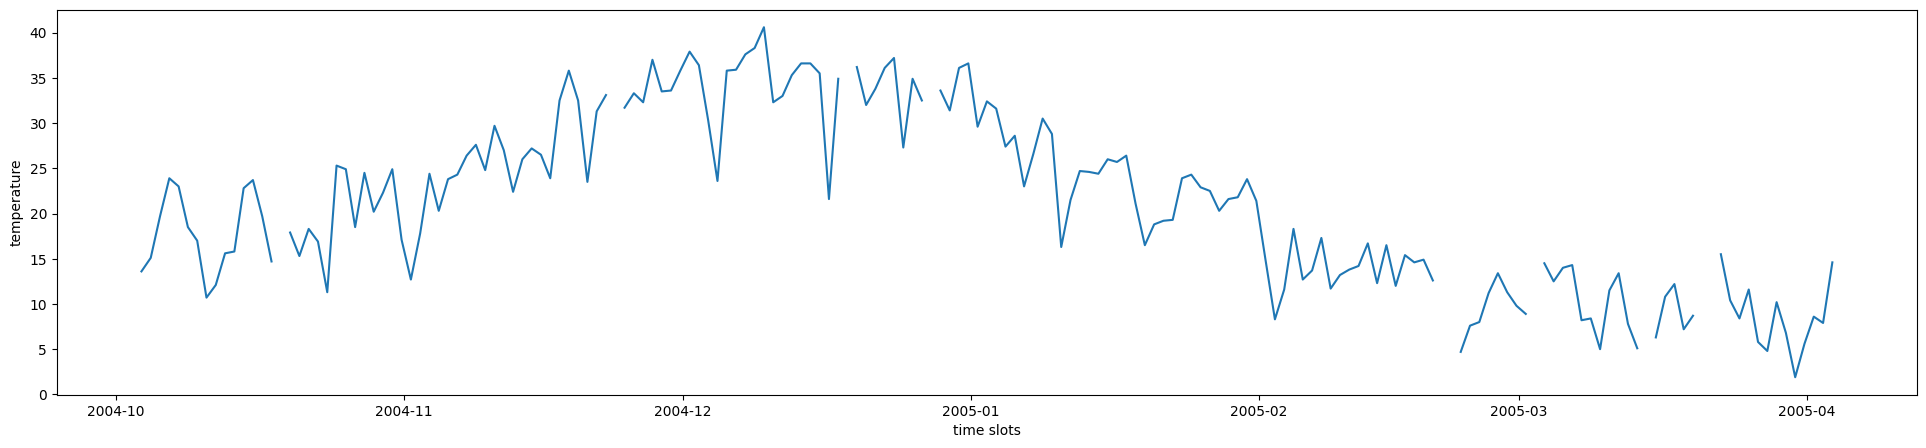

In [24]:
plt.figure(figsize=(24,5))
plt.plot(airqual_data[::48]['Date'], airqual_data[::48]['Temp'])
plt.ylabel('temperature')
plt.xlabel('time slots')

********************************************************************************************

In [ ]:
airqual_data['Month'] = airqual_data['Date'].dt.month
airqual_data

In [ ]:
airqual_data['Year'] = airqual_data['Date'].dt.year
airqual_data

Let's explore the data types of each column

In [4]:
airqual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8777 entries, 0 to 8776
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     8777 non-null   datetime64[ns]
 1   Temp     8777 non-null   float64       
 2   Rel_Hum  8777 non-null   float64       
 3   Abs_Hum  8777 non-null   float64       
 4   day      8777 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1)
memory usage: 308.7 KB


>#### <font color=#800080>Task:</font> <a class="anchor" id="Task-1"></a>

* Take a look at the data and report what you observe.


Let's get  a visual of the series  by running the code below to see the evolution of temperature.

1. Report on what you observe?
2. If you have spotted any anomaly, what do you suggest we do about it?

Text(0.5, 0, 'time slots')

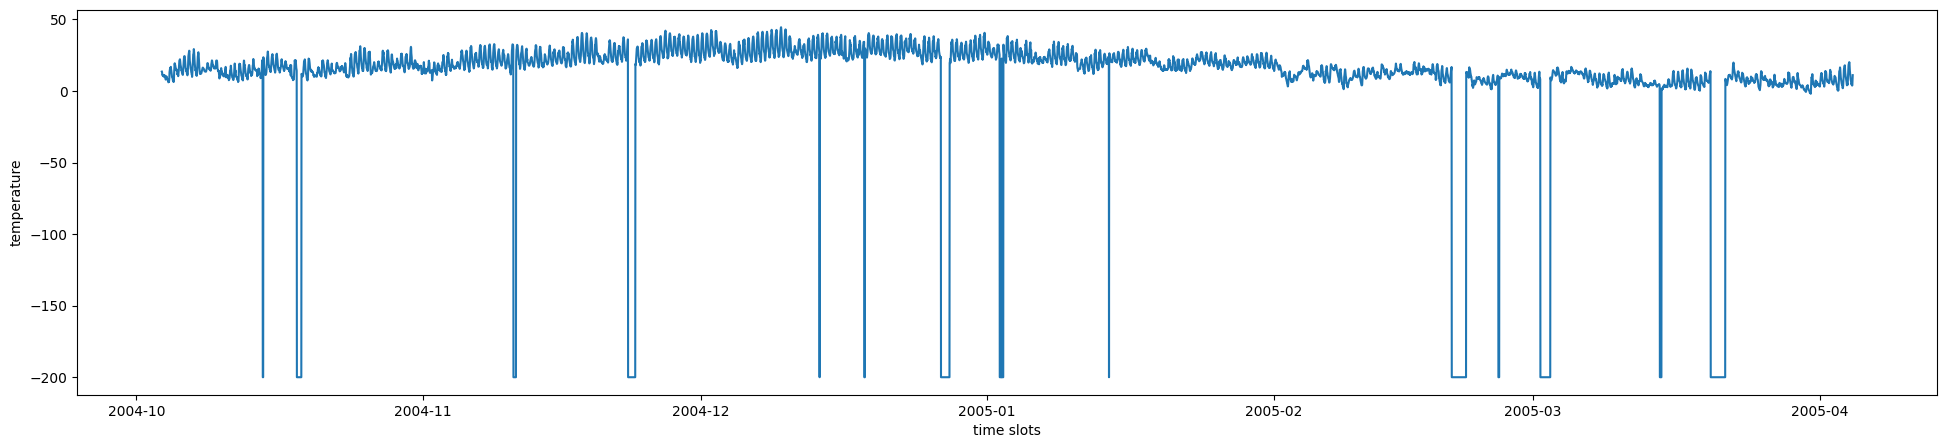

In [8]:
plt.figure(figsize=(24,5))
plt.plot(airqual_data['Date'], airqual_data['Temp'])
plt.ylabel('temperature')
plt.xlabel('time slots')

* Look at the dynamics and observe the sudden drop in temperature.  
* We can see that temperature has been recorded at -200 degrees. 
* It does not make sense for temperature to reach -200 degrees, so that it is probably the strategy used to encode the missing information.

Text(0.5, 0, 'time slots')

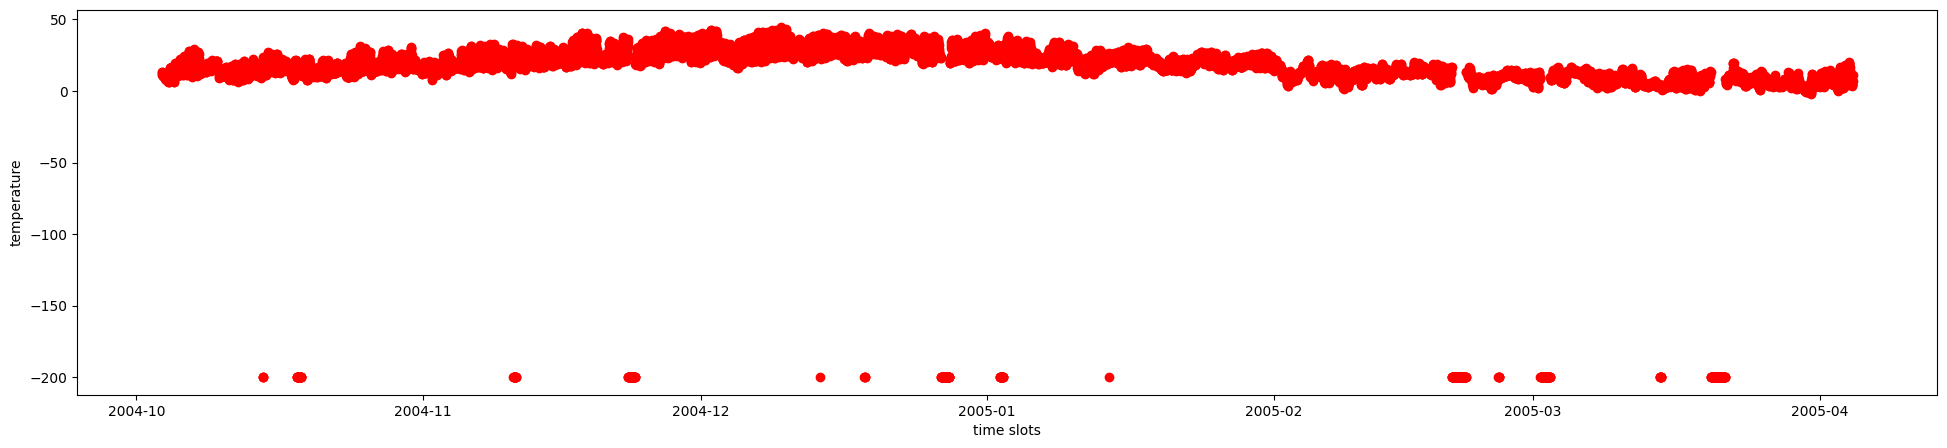

In [9]:
#here is the scatterplot

plt.figure(figsize=(24,5))
plt.scatter(airqual_data['Date'], airqual_data['Temp'] ,color= 'red')
plt.ylabel('temperature')
plt.xlabel('time slots')

>#### <font color=#800080>Task:</font> <a class="anchor" id="Task-1"></a>

* Out of the two above plots, which one visually conveys more information?

Let's Replace the `-200` degree value with numpy missing value .

In [11]:
import numpy as np

* The code below replace -200 by np.nan

* The inplace parameter ensure that the replacement takes place permanently in the dataset.

In [16]:
airqual_data.replace({'Temp': { -200: np.nan}}, inplace = True)

In [17]:
airqual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8777 entries, 0 to 8776
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     8777 non-null   datetime64[ns]
 1   Temp     8412 non-null   float64       
 2   Rel_Hum  8777 non-null   float64       
 3   Abs_Hum  8777 non-null   float64       
 4   day      8777 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1)
memory usage: 308.7 KB


See how this changes the display of the graph

In [15]:
airqual_data[airqual_data['Temp'].isna() == True]

,Date,Temp,Rel_Hum,Abs_Hum,day
524,2004-10-14 16:00:00,NaN,-200.0,-200.0,14
525,2004-10-14 16:30:00,NaN,-200.0,-200.0,14
526,2004-10-14 17:00:00,NaN,-200.0,-200.0,14
701,2004-10-18 08:30:00,NaN,-200.0,-200.0,18
702,2004-10-18 09:00:00,NaN,-200.0,-200.0,18
...,...,...,...,...,...
8110,2005-03-21 17:00:00,NaN,-200.0,-200.0,21
8111,2005-03-21 17:30:00,NaN,-200.0,-200.0,21
8112,2005-03-21 18:00:00,NaN,-200.0,-200.0,21
8113,2005-03-21 18:30:00,NaN,-200.0,-200.0,21


Text(0.5, 0, 'time slots')

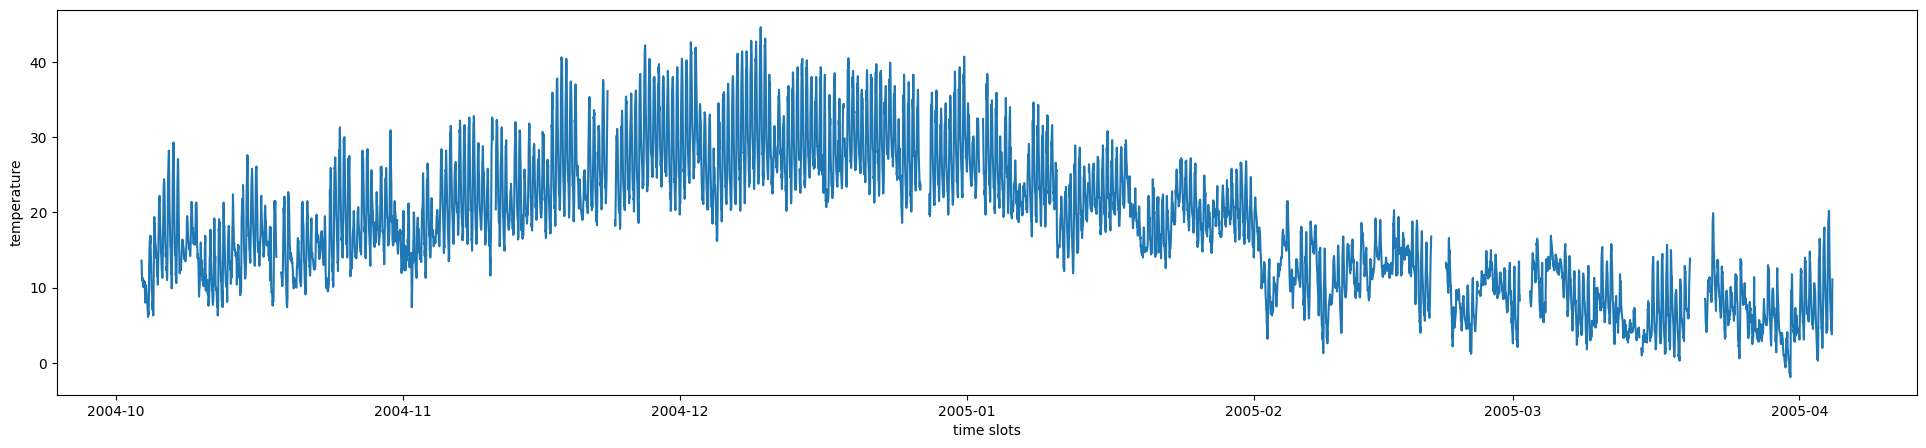

In [18]:
plt.figure(figsize=(24,5))
plt.plot(airqual_data['Date'], airqual_data['Temp'])
plt.ylabel('temperature')
plt.xlabel('time slots')

In other circonstances, one might try to replace the missing  values with the average of the rest. Here is the code below.
Explain why the pros and cons of that ?



In [25]:
Mean = airqual_data['Temp'].mean()
Mean

np.float64(18.445066571564432)

In [26]:
airqual_data.replace({'Temp': { np.nan: airqual_data['Temp'].mean()}}, inplace = True)

In [27]:
airqual_data[airqual_data['Temp'].isna() == True]

,Date,Temp,Rel_Hum,Abs_Hum,day


Text(0.5, 0, 'time slots')

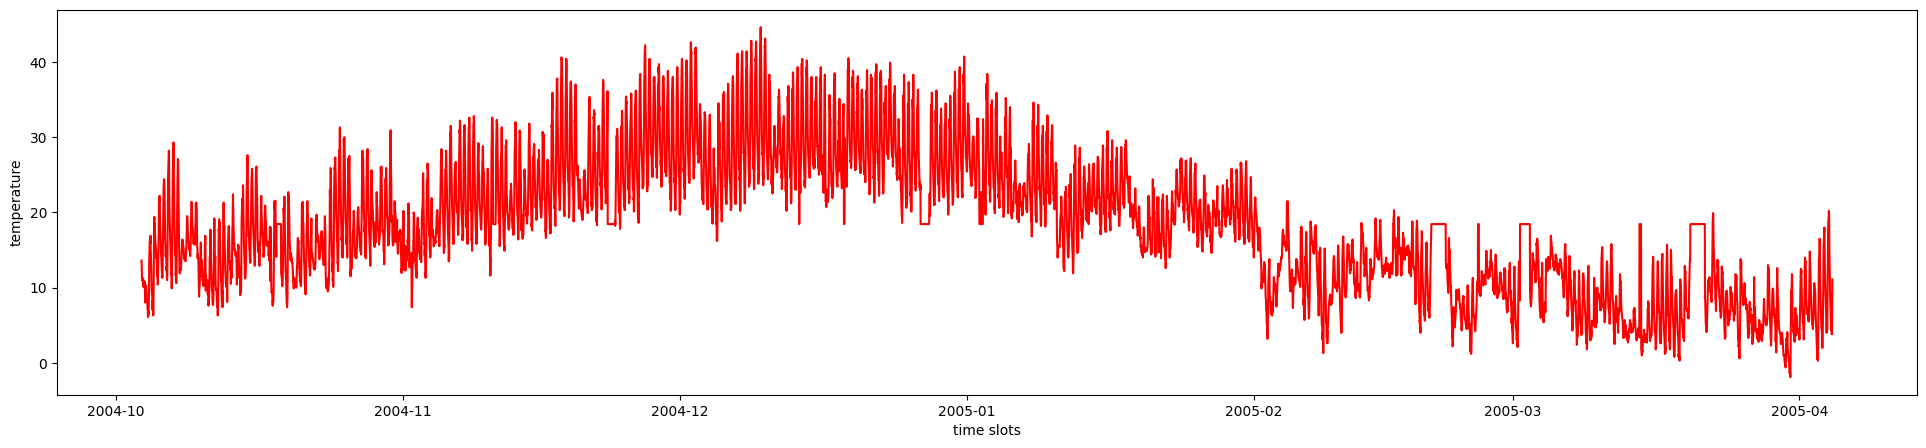

In [28]:
plt.figure(figsize=(24,5))
plt.plot(airqual_data['Date'], airqual_data['Temp'] , 'red')
plt.ylabel('temperature')
plt.xlabel('time slots')

### From Datetime to date and time


When you have a date and a timestamp, you can decompose them into their
components. As shown below, we are breaking the `Date` column into actual `dates` and `time column` respectively.

In [29]:
# Splitting date and time
airqual_data["dates"] = airqual_data["Date"].dt.date
airqual_data["times"] = airqual_data["Date"].dt.time
airqual_data.head()

,Date,Temp,Rel_Hum,Abs_Hum,day,dates,times
0,2004-10-03 18:00:00,13.6,48.9,0.7578,3,2004-10-03,18:00:00
1,2004-10-03 18:30:00,13.3,47.7,0.7255,3,2004-10-03,18:30:00
2,2004-10-03 19:00:00,11.9,54.0,0.7502,3,2004-10-03,19:00:00
3,2004-10-03 19:30:00,11.0,60.0,0.7867,3,2004-10-03,19:30:00
4,2004-10-03 20:00:00,11.2,59.6,0.7888,3,2004-10-03,20:00:00


### Exploring the date 

The `date` itself could also be decomposed it into smaller components, which includes year, month and day as shown below. Further down the line, this could in turn unlock information related to **weekly observations, monthly insights or quaterly observations**. 

In [30]:
airqual_data["year"] = airqual_data["Date"].dt.year

airqual_data["month"] = airqual_data["Date"].dt.month_name()

#if you prefer month number instead of month name, uncomment the code below:
#airqual_data["month"] = airqual_data["Date"]..dt.month
airqual_data["day"] = airqual_data["Date"].dt.day_name()
#airqual_data["day"] = airqual_data["Date"]..dt.day


airqual_data.head()

,Date,Temp,Rel_Hum,Abs_Hum,day,dates,times,year,month
0,2004-10-03 18:00:00,13.6,48.9,0.7578,Sunday,2004-10-03,18:00:00,2004,October
1,2004-10-03 18:30:00,13.3,47.7,0.7255,Sunday,2004-10-03,18:30:00,2004,October
2,2004-10-03 19:00:00,11.9,54.0,0.7502,Sunday,2004-10-03,19:00:00,2004,October
3,2004-10-03 19:30:00,11.0,60.0,0.7867,Sunday,2004-10-03,19:30:00,2004,October
4,2004-10-03 20:00:00,11.2,59.6,0.7888,Sunday,2004-10-03,20:00:00,2004,October


As you could observe, separate columns have been allocated to `year`, `month` and `day`, which makes it easier to query the data effectively. For instance, see this concrete example. 

### Context:


The first part of the rainy season in the Democratic Republic of Congo usually runs from `October` to `December`. Farmers usually termed it as `mpisoli ya banzambe` (tears of gods). Let's call it **"mpisoli"** for the sake of this exercise. Here is how the operations performed above could be useful.


The Enigneers from the P.L. Global Constulting might want to know:

* The maximum air temperature throughout the whole Mpisoli duration,
* The average air temperature of each month of that period.
* The highest absolute humidity for each month of that spell.

Let's extract those information from the dataframe.

In [31]:
airqual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8777 entries, 0 to 8776
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     8777 non-null   datetime64[ns]
 1   Temp     8777 non-null   float64       
 2   Rel_Hum  8777 non-null   float64       
 3   Abs_Hum  8777 non-null   float64       
 4   day      8777 non-null   object        
 5   dates    8777 non-null   object        
 6   times    8777 non-null   object        
 7   year     8777 non-null   int32         
 8   month    8777 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(4)
memory usage: 583.0+ KB


* The unique function allows you to see the unique instance within a category. 

* It removes the duplicates. It is useful when you want to filter the dataframe according to a certain value within a category.

In [32]:
airqual_data['month'].unique()

array(['October', 'November', 'December', 'January', 'February', 'March',
       'April'], dtype=object)

In [35]:
mpisoli_data = airqual_data[airqual_data['month'].\
                            isin(['October', 'November', 'December'])]
mpisoli_data

,Date,Temp,Rel_Hum,Abs_Hum,day,dates,times,year,month
0,2004-10-03 18:00:00,13.6,48.9,0.7578,Sunday,2004-10-03,18:00:00,2004,October
1,2004-10-03 18:30:00,13.3,47.7,0.7255,Sunday,2004-10-03,18:30:00,2004,October
2,2004-10-03 19:00:00,11.9,54.0,0.7502,Sunday,2004-10-03,19:00:00,2004,October
3,2004-10-03 19:30:00,11.0,60.0,0.7867,Sunday,2004-10-03,19:30:00,2004,October
4,2004-10-03 20:00:00,11.2,59.6,0.7888,Sunday,2004-10-03,20:00:00,2004,October
...,...,...,...,...,...,...,...,...,...
4279,2004-12-31 21:30:00,27.2,33.3,1.1788,Friday,2004-12-31,21:30:00,2004,December
4280,2004-12-31 22:00:00,27.5,30.9,1.1155,Friday,2004-12-31,22:00:00,2004,December
4281,2004-12-31 22:30:00,27.1,33.3,1.1762,Friday,2004-12-31,22:30:00,2004,December
4282,2004-12-31 23:00:00,26.4,35.1,1.1919,Friday,2004-12-31,23:00:00,2004,December


### 1. The maximum air temperature throughout the whole Mbula duration

In [36]:
mpisoli_data['Temp'].max()

np.float64(44.6)

### 2. The average air temperature of each month of that period.

In [37]:
mpisoli_data.groupby('month')['Temp'].mean()

month
December    28.899498
November    23.915030
October     16.107461
Name: Temp, dtype: float64

In [39]:
pd.DataFrame(mpisoli_data.groupby('month')['Temp'].mean()).reset_index()

,month,Temp
0,December,28.899498
1,November,23.915030
2,October,16.107461


### 3. The highest absolute humidity for each month of that spell.

In [40]:
pd.DataFrame(mpisoli_data.groupby('month')['Abs_Hum'].max())

,Abs_Hum
month,
December,2.1806
November,1.9390
October,1.4852


In [41]:
pd.DataFrame(mpisoli_data.groupby('month')['Abs_Hum'].max()).reset_index()

,month,Abs_Hum
0,December,2.1806
1,November,1.9390
2,October,1.4852


One could also choose to focus on specific month and get any summary related to that month. See below for instance, the minimum temperature in November 2004.

>#### <font color=#800080>Q:</font> <a class="anchor" id="Task-1"></a>


Another interesting insight is that one could also group data in terms of weeks prior to extracting information from it. For the dataframe to respond to the query effectively, we should set the date column as an index of the dataframe using the `set_index` function. 

In [42]:
mpisoli_data.set_index('Date', inplace=True)
mpisoli_data

,Temp,Rel_Hum,Abs_Hum,day,dates,times,year,month
Date,,,,,,,,
2004-10-03 18:00:00,13.6,48.9,0.7578,Sunday,2004-10-03,18:00:00,2004,October
2004-10-03 18:30:00,13.3,47.7,0.7255,Sunday,2004-10-03,18:30:00,2004,October
2004-10-03 19:00:00,11.9,54.0,0.7502,Sunday,2004-10-03,19:00:00,2004,October
2004-10-03 19:30:00,11.0,60.0,0.7867,Sunday,2004-10-03,19:30:00,2004,October
2004-10-03 20:00:00,11.2,59.6,0.7888,Sunday,2004-10-03,20:00:00,2004,October
...,...,...,...,...,...,...,...,...
2004-12-31 21:30:00,27.2,33.3,1.1788,Friday,2004-12-31,21:30:00,2004,December
2004-12-31 22:00:00,27.5,30.9,1.1155,Friday,2004-12-31,22:00:00,2004,December
2004-12-31 22:30:00,27.1,33.3,1.1762,Friday,2004-12-31,22:30:00,2004,December


If we are interested in the **weekly averages of Temperature or/and absolute humidity** during mpisoli, one could groupby the data by weeks using the frequency parameter, and pass in a list of variables we need the aggregates for.

In [45]:
weekly_grouping_mpisoli = mpisoli_data.groupby(pd.Grouper(freq='7d')) #7d = 7 days


In [46]:
weekly_grouping_mpisoli[['Temp', 'Abs_Hum']].mean()

,Temp,Abs_Hum
Date,,
2004-10-03,15.449333,0.847543
2004-10-10,14.655760,-0.990432
2004-10-17,14.789529,-13.467515
2004-10-24,19.383929,0.993338
2004-10-31,18.052679,0.969073
2004-11-07,22.450687,-7.461052
2004-11-14,24.937798,1.229609
2004-11-21,26.565216,-21.495399
2004-11-28,29.154167,1.274843


In [47]:
weekly_data_mpisoli = weekly_grouping_mpisoli[['Temp', 'Abs_Hum']].mean().reset_index()
weekly_data_mpisoli

,Date,Temp,Abs_Hum
0,2004-10-03,15.449333,0.847543
1,2004-10-10,14.655760,-0.990432
2,2004-10-17,14.789529,-13.467515
3,2004-10-24,19.383929,0.993338
4,2004-10-31,18.052679,0.969073
5,2004-11-07,22.450687,-7.461052
6,2004-11-14,24.937798,1.229609
7,2004-11-21,26.565216,-21.495399
8,2004-11-28,29.154167,1.274843
9,2004-12-05,29.969345,1.265591


This can lead to answering questions like: 
* What is the week with the lowest temperature?
* Oaverage, does temperature tend to increase on weekly basis?

Or also lead to the generation of weekly summaries as seen below.

Text(0.5, 1.0, 'Weekly temperature during Mpisoli')

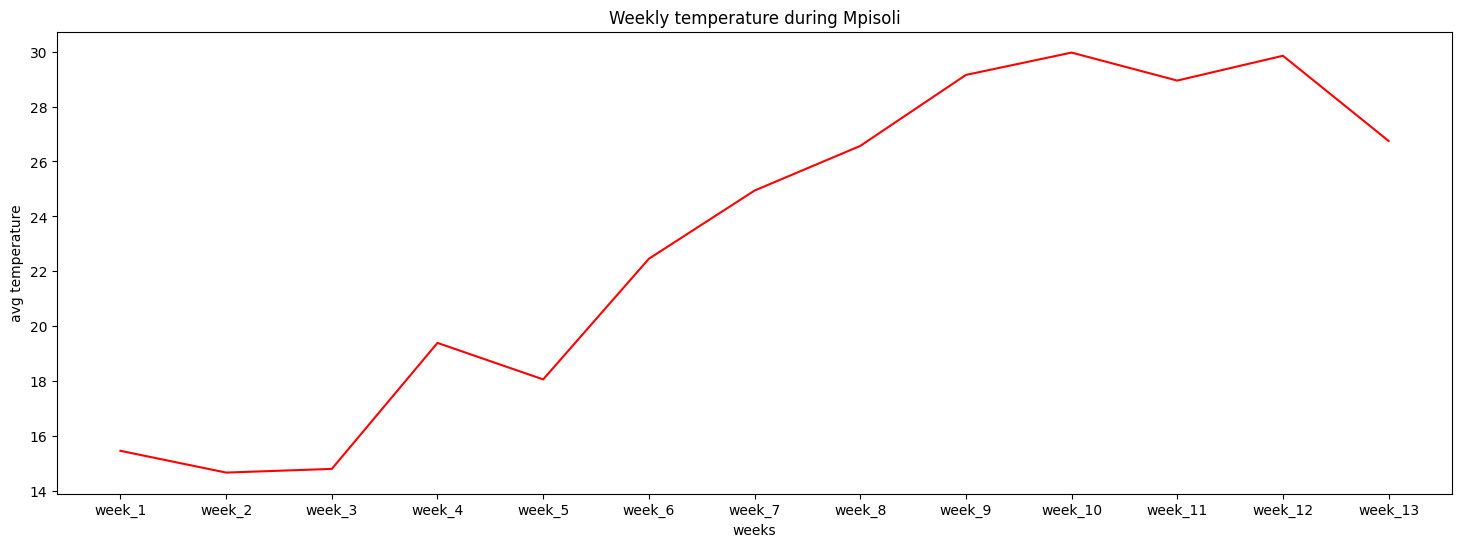

In [48]:
weeks = ['week_'+ str(i+1) for i in range(13)]
plt.figure(figsize=(18,6))
plt.plot(weeks, weekly_data_mpisoli['Temp'] , color = 'red')
plt.xlabel('weeks')
plt.ylabel('avg temperature')
plt.title('Weekly temperature during Mpisoli')

### Assembling Multiple Columns to a Datetime


Sometimes, data could be collected in form of separate columns of date components like  year, month,
and day. We could also assemble that and create a date column from those components still, using the `.to_datetime()` method. Here, we create a `date_2` column to work that out.

In [49]:
airqual_data2  =  airqual_data.copy()


airqual_data2["year"] = airqual_data2["Date"].dt.year

airqual_data2["month"] = airqual_data2["Date"].dt.month
airqual_data2["day"] = airqual_data2["Date"].dt.day


airqual_data2.head()

,Date,Temp,Rel_Hum,Abs_Hum,day,dates,times,year,month
0,2004-10-03 18:00:00,13.6,48.9,0.7578,3,2004-10-03,18:00:00,2004,10
1,2004-10-03 18:30:00,13.3,47.7,0.7255,3,2004-10-03,18:30:00,2004,10
2,2004-10-03 19:00:00,11.9,54.0,0.7502,3,2004-10-03,19:00:00,2004,10
3,2004-10-03 19:30:00,11.0,60.0,0.7867,3,2004-10-03,19:30:00,2004,10
4,2004-10-03 20:00:00,11.2,59.6,0.7888,3,2004-10-03,20:00:00,2004,10


In [50]:
airqual_data2["date_2"] = pd.to_datetime(airqual_data2[["year", "month", "day"]])
airqual_data2.head()

,Date,Temp,Rel_Hum,Abs_Hum,day,dates,times,year,month,date_2
0,2004-10-03 18:00:00,13.6,48.9,0.7578,3,2004-10-03,18:00:00,2004,10,2004-10-03
1,2004-10-03 18:30:00,13.3,47.7,0.7255,3,2004-10-03,18:30:00,2004,10,2004-10-03
2,2004-10-03 19:00:00,11.9,54.0,0.7502,3,2004-10-03,19:00:00,2004,10,2004-10-03
3,2004-10-03 19:30:00,11.0,60.0,0.7867,3,2004-10-03,19:30:00,2004,10,2004-10-03
4,2004-10-03 20:00:00,11.2,59.6,0.7888,3,2004-10-03,20:00:00,2004,10,2004-10-03


># <font color=#800080>Task 3:</font> <a class="anchor" id="Task-1"></a>


Monitoring air quality and understanding the data can help many industries make better decisions, use cleaner technologies, protect public health, and improve the environment.

For example, in agriculture, **good air quality** is important for crop health. Farmers can use air quality data to track pollutants that can harm their crops and reduce yields.

Good air quality can also help farmers make decisions about their farming practices. For example, they can choose crop varieties that are resistant to certain pollutants or change their farming practices to reduce the effects of poor air quality.

You are a data analyst working with **JVE Mali**, an environmental agency in Mali. Your goal is to provide farmers with insights into air quality so that they can decide which crops to grow and when to visit their farms without worrying about respiratory diseases caused by air pollution.

Using data from the government project **"Encourager le Paysan Malien (EPM)"**, which aims to promote farming among young people, you have measured different pollutants in Sikasso.

* PM2.5 (Fine particulate matter)
* PM10 (Coarse particulate matter)
* O₃ (Ozone)
* CO (Carbon monoxide)
* SO₂ (Sulfur dioxide)
* NO₂ (Nitrogen dioxide)



The resulting information is encapsulated in the csv file called `sikasso_aq.csv`.


1. Load the dataset and tell us what you observe.

2.  Create a dataframe that shows the average monthly amount of coarse particulate matter `(PM10)`. In the final table, make sure to replace the month number with the actual month name. You can use the following hint:

`data_frame['month_name'] = pd.to_datetime(data_frame['month'], format='%m').dt.month_name().str.slice()`


3.  Create a graph that shows how the average monthly amount of coarse particulate matter (PM10) changes over time. Identify the months with the lowest and highest average values. Record these values somewhere, as they represent the lowest and highest values for that pollutant ($C_{low}$ and $C_{high}$). 

4. Repeat steps 2 and 3 for all other pollutants. To avoid having to write the code from scratch, you can create functions to perform these steps.


5. Calculate the average amount of each pollutant for each quarter of the year. Identify the lowest and highest values for each pollutant.


### Solution